# Emotional Dynamics Project

A presentation of this project can be found in the Emotion_Dynamics_Project_Presentation.pdf. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams.update({'font.size': 16})

# Code for 2d emotion system

This is the code for a system of two variables. Each variable represents the strength of the emotion. A system of two variables can be easily visualized, which can help us understand what the dynamics looks like. The function f describes the dynamical interactions between these different variables that represent the strength of each emotion. These results can be compared to experimental results which use techniques such as Experimental Sampling Method (ESM).

This section is a preparation for the next section where I treat a system of four different emotions.

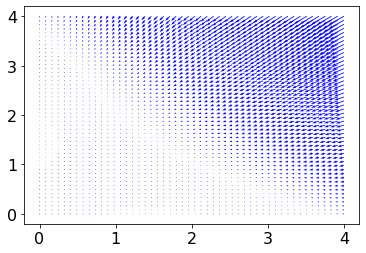

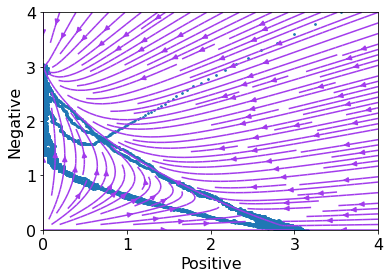

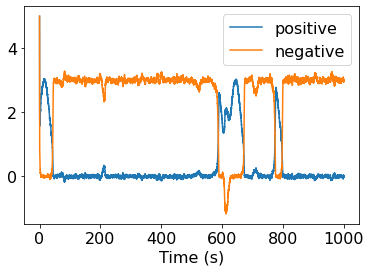

In [7]:
def f(Y, t, sigma, sqrtdt):
    y1, y2 = Y
    dy1 =   3*y1  - y1*y1 - 2*y1*y2  
    dy2 = 3*y2  - y2*y2 - y1*y2
    return [dy1, dy2]

maxtime = 0.1
#sigma = 4.5  # Standard deviation.
sigma = 4.5
mu = 0  # Mean.
#tau = maxtime  # Time constant.
Delta_t = 0.01
dt = Delta_t  # Time step.
sqrtdt = np.sqrt(dt)

x_max = 4
y_max = 4
y1 = np.linspace(0, x_max,50)
y2 = np.linspace(0, y_max, 50)

#y1 = np.linspace(-10, 10, 40)
#y2 = np.linspace(-100, 100, 40)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t, sigma, sqrtdt)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='blue')
plt.show()
plt.streamplot(Y1, Y2, u, v, density=1.4, linewidth=None, color='#A23BEC')

plt.xlabel('Positive')
plt.ylabel('Negative')
#plt.xlim([-2, 8])
#plt.ylim([-4, 4])


def df(y1, y2, delta_t,sigma, sqrtdt, U):
    dy1 =   3*y1  - y1*y1 - 2*y1*y2  + sigma * sqrtdt * np.random.randn()
    dy2 = (2 + U)*y2  - y2*y2 - y1*y2+ sigma * sqrtdt * np.random.randn()

    return [dy1, dy2]



m_init =[5]
v_init = [5]

for i in [0]:
    M = []
    V = []
    Delta_t = 0.01
    
    maxtime =1000
    t = 0
    count = 1
    t_rec = [t]
    
    m = m_init[i]
    v = v_init[i]
    
    M = [m]
    V = [v]
    
    while (t < maxtime):
        U = 1*np.sin(t/10)
        dff = df(m, v, Delta_t, sigma, sqrtdt, U)
        m += dff[0]*Delta_t
        v += dff[1]*Delta_t
        t += Delta_t
        
        count += 1
        t_rec.append(t)
        M.append(m)
        V.append(v)
    
    #plt.scatter(M,V, linewidth = 2, alpha = 1)
    plt.scatter(M,V, s = 3, alpha = 1)

plt.xlim(0,x_max)
plt.ylim(0, y_max)
plt.show()
plt.plot(t_rec, V, label = 'positive')
plt.plot(t_rec, M, label = 'negative')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

# Code for 4d emotion system

The variables x, y, z, v represent different emotions, where two are positive and two are negative emotions. The function df describes the dynamical interactions between these different variables that represent the strength of each emotion.

95.4929658551372


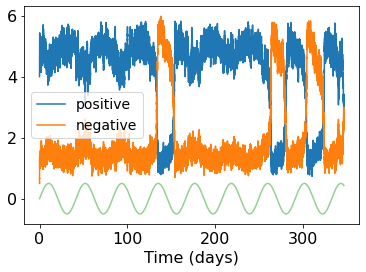

In [3]:
def df(x, y, z, v, c1, c2, M, sigma, sqrtdt):
    dx =  1.6 + x + c1*x*x + c2*y*x + c1*z*x + c1*v*x + sigma * sqrtdt * np.random.randn()
    dy =  1.6 + y + c2*x*y + c1*y*y + c1*z*y + c1*v*y  + sigma * sqrtdt * np.random.randn()
    dz =  1.6 + (1 + M)*z + c1*x*z + c1*y*z + c1*z*z + c2*v*z  + sigma * sqrtdt * np.random.randn()
    dv =  1.6 + (1 + M)*v + c1*x*v + c1*y*v + c2*z*v + c1*v*v  + sigma * sqrtdt * np.random.randn()
    return [dx, dy, dz, dv]




c1 = -0.2
c2 = 0.04
M = 0.1

maxtime = 5000
#sigma = 4.5  # Standard deviation.
sigma = 4.5
mu = 0  # Mean.
#tau = maxtime  # Time constant.
Delta_t = 0.05
dt = Delta_t  # Time step.
sqrtdt = np.sqrt(dt)





#Trajectory======================================================
x_init =[4, -20 + 10**(-6)]
y_init = [4, 0]
z_init = [0.5,0]
v_init = [0.5, 0]

X_REC = []
Y_REC = []
Z_REC = []
V_REC = []

for i in [0]:
    #ax = plt.axes(projection = '3d')
    
    X = []
    Y = []
    Z = []
    V = []
    
    
    
    t = 0
    count = 1
    t_rec = [t]
    
    x = x_init[i]
    y = y_init[i]
    z = z_init[i]
    v = v_init[i]
    
    X = [x]
    Y = [y]
    Z = [z]
    V = [v]
    period = 600/(2*np.pi)
    print(period)
    while (t < maxtime):
        M =  0.05*np.sin(t/period) #1/(t-50)**2 #
        dff = df(x, y, z, v, c1, c2, M, sigma, sqrtdt)
        x += dff[0]*Delta_t
        y += dff[1]*Delta_t
        z += dff[2]*Delta_t
        v += dff[3]*Delta_t
        t += Delta_t
        
        count += 1
        t_rec.append(t)
        X.append(x)
        Y.append(y)
        Z.append(z)
        V.append(v)
    

    plt.show()
    X_REC.append(X)
    Y_REC.append(Y)
    Z_REC.append(Z)
    V_REC.append(V)



plt.plot(np.array(t_rec)*((1/Delta_t)*5)/1440, Y_REC[0], label = 'positive')
#plt.show()
plt.plot(np.array(t_rec)*((1/Delta_t)*5)/1440, V_REC[0],  label = 'negative')
plt.plot(np.array(t_rec)*((1/Delta_t)*5)/1440, 0.5*np.sin(np.array(t_rec)/period), alpha = 0.5)
#plt.xticks(t_rec, ((maxtime/Delta_t)*5)/1440)
plt.legend(fontsize =14)#,loc = 'lower right')
plt.xlabel('Time (days)')
#plt.xlim(0,10)
#plt.savefig("transitions.svg")
plt.show()
#=============================================================

# Code for calculating the graph showing average number of transitions -vs- stress function frequency

Text(0, 0.5, 'Number of transitions')

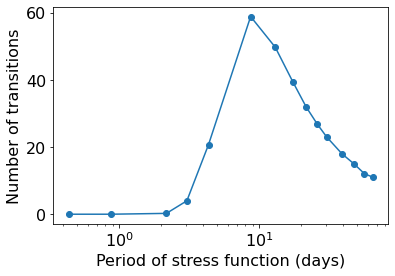

In [4]:
def df(x, y, z, v, c1, c2, M, sigma, sqrtdt):
    dx =  1.6 + x + c1*x*x + c2*y*x + c1*z*x + c1*v*x + sigma * sqrtdt * np.random.randn()
    dy =  1.6 + y + c2*x*y + c1*y*y + c1*z*y + c1*v*y  + sigma * sqrtdt * np.random.randn()
    dz =  1.6 + (1 + M)*z + c1*x*z + c1*y*z + c1*z*z + c2*v*z  + sigma * sqrtdt * np.random.randn()
    dv =  1.6 + (1 + M)*v + c1*x*v + c1*y*v + c2*z*v + c1*v*v  + sigma * sqrtdt * np.random.randn()
    return [dx, dy, dz, dv]





c1 = -0.2
c2 = 0.04
M = 0.1

maxtime = 5000
#sigma = 4.5  # Standard deviation.
sigma =4.5
mu = 0  # Mean.
#tau = maxtime  # Time constant.
Delta_t = 0.05
dt = Delta_t  # Time step.
sqrtdt = np.sqrt(dt)







num_samples = 20
#spread = [1,2,5,10,20,50,100,200,500,1000,2000,5000]
spread = [1,2,5,7,10,20,30,40,50,60,70,90,110,130,150] #1000,2000,5000]

#spread = [100]
#Trajectory======================================================
x_init =[4]*len(spread)
y_init = [4]*len(spread)
z_init = [0.5]*len(spread)
v_init = [0.5]*len(spread)

X_REC = []
Y_REC = []
Z_REC = []
V_REC = []

Transition_REC = []

for i in range(len(spread)):
    
    Transitions = []
    
    for n in range(num_samples):
    #ax = plt.axes(projection = '3d')
        state = 0
    
        X = []
        Y = []
        Z = []
        V = []
        
        
        
        t = 0
        count = 1
        t_rec = [t]
        
        x = x_init[i]
        y = y_init[i]
        z = z_init[i]
        v = v_init[i]
        
        X = [x]
        Y = [y]
        Z = [z]
        V = [v]
        period = spread[i]
        
        while (t < maxtime):
            M =  0.1*np.sin(t/period) #1/(t-50)**2 #
            dff = df(x, y, z, v, c1, c2, M, sigma, sqrtdt)
            x += dff[0]*Delta_t
            y += dff[1]*Delta_t
            z += dff[2]*Delta_t
            v += dff[3]*Delta_t
            t += Delta_t
            
            count += 1
            t_rec.append(t)
            X.append(x)
            Y.append(y)
            Z.append(z)
            V.append(v)
 
        
        
        num_transitions = 0
        for j in range(len(V) - 1):
            
            if (V[j] < 2) and state == 1:
                num_transitions += 1
                state = 0
            elif (V[j] > 4) and (state == 0):
                num_transitions += 1
                state = 1
        Transitions.append(num_transitions)
        

        
    X_REC.append(X)  #sample trajectory stored in X_REC.
    Y_REC.append(Y)
    Z_REC.append(Z)
    V_REC.append(V)
        
    Transition_REC.append(np.average(Transitions))
        



   
#=============================================================
plt.scatter(2*np.pi*np.array(spread)*((1/Delta_t)*5)/1440, Transition_REC)
plt.plot(2*np.pi*np.array(spread)*((1/Delta_t)*5)/1440, Transition_REC)
plt.xscale("log")
plt.xlabel('Period of stress function (days)')
plt.ylabel('Number of transitions')

In [5]:
print(Transition_REC)

[0.0, 0.0, 0.25, 4.0, 20.75, 58.9, 49.75, 39.5, 31.9, 26.8, 23.0, 18.0, 14.95, 12.1, 11.0]


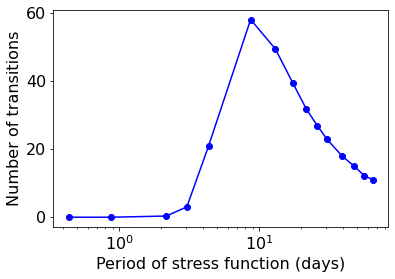

In [6]:
#Transition_REC =[0.0, 0.0, 0.0, 0.0, 0.1, 2.05, 3.4, 3.0, 4.3, 4.75, 4.5, 5.55, 5.1, 5.2, 4.65]
Transition_REC = [0.0, 0.0, 0.35, 3.05, 20.9, 58.1, 49.5, 39.5, 31.8, 26.9, 23.0, 18.0, 15.0, 12.2, 11.0]
Delta_t = 0.05
spread = [1,2,5,7,10,20,30,40,50,60,70,90,110,130,150] #1000,2000,5000]

plt.scatter(2*np.pi*np.array(spread)*((1/Delta_t)*5)/1440, Transition_REC, c = 'blue')
plt.plot(2*np.pi*np.array(spread)*((1/Delta_t)*5)/1440, Transition_REC, c= 'blue')
plt.xscale("log")
plt.xlabel('Period of stress function (days)')
plt.ylabel('Number of transitions')
plt.savefig("transitions2.svg")